<a href="https://colab.research.google.com/github/pozueco/bq_training/blob/main/bigquery_for_ga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data extract from Google Analytics in BigQuery

Both Universal Analytics and GA4 allow for the automatic extraction of data from Google Analytics to BigQuery. The following steps can be taken to achieve this, and more information about the available data can be found in the next two sections

# BigQuery extract for UA

In order to 

1. Create a Google API Console project and enable the BigQuery API

2. Prepare a project for BigQuery export with billing enabled

3. Link BigQuery to Google Analytics 360 in the Google Analytics admin

4. Make sure the following service account has edit access to the Cloud Project:

analytics-processing-dev@system.gserviceaccount.com

More information can be found in the following link:

https://support.google.com/analytics/answer/3416092?hl=en#zippy=%2Cin-this-article

Once Google Analytics 360 and BigQuery have been linked, a daily table will be exported to BigQuery on a daily basis:

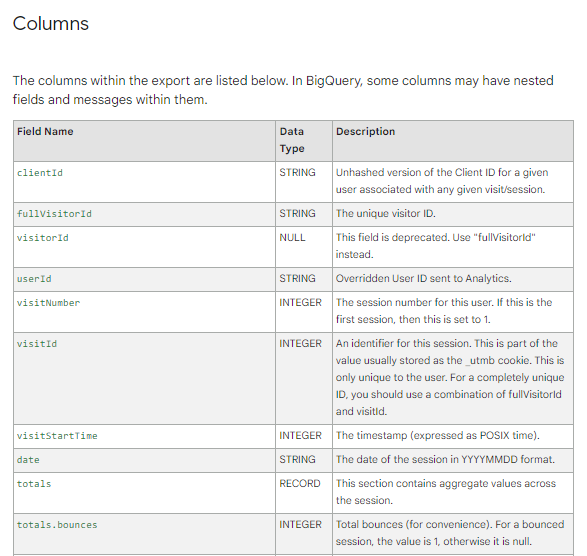

More information can be found at:

https://support.google.com/analytics/answer/3437719?hl=en

# BigQuery extract for GA4



https://support.google.com/analytics/answer/9358801?hl=en